<a href="https://colab.research.google.com/github/mwahajkhan/exploratory-data-analysis/blob/main/Feature_Egineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Feature Engineering with Linear Regression: Applied to the Ames Housing Data

Using the Ames Housing Data:

Linear regression models to predict housing prices from this data. In particular, improving on a baseline set of features via **feature engineering**: deriving new features from our existing data.


> 1. EDA
> 2. One-hot Encoding variables
> 3. Log transformation for skewed variables
> 4. Pair plot for features
> 5. Basic feature engineering: adding polynomial and interaction terms
> 6. Feature engineering: categories and features derived from category aggregates


##Importing Libraries

In [23]:
!pip install -q pandas numpy seaborn pandas skillsnetwork

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 15.4 MB/s eta 0:00:00


In [2]:
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#sns.set()   #initially setting default outputs fro seaborn plots

In [5]:
path = '/content/sample_data/Ames_Housing_Data.csv'

In [7]:
df = pd.read_csv(path)

In [61]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [8]:
df.info()    #provides column names, number of non null values, dtypes of columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

**This step is recommended by the data set author to remove a few outliers**

In [9]:
#df.loc pulls all of the rows except those under 4000,
#: mentions pull all of columns

df = df.loc[df['Gr Liv Area'] <= 4000,:]


#.shape[] outputs tuples with [0] number of rows, and [1] number of columns
print("Number of rows in the data:", df.shape[0])
print("Number of columns in the data:", df.shape[1])

# Keep a copy our original data
data = df.copy()

Number of rows in the data: 2925
Number of columns in the data: 82


In [10]:
# A quick look at the data:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


**Drop Unique Columns before modeling, as unique values do not add any value in our model**

> Model cannot learn anything if every single value in the column is a unique value.

In [17]:
#Values in the columns are unique, as length = rows of column

len(df.PID.unique())
len(df.Order.unique())

2925

In [18]:
#dropping the unique columns from dataset

#axis =1 ensures delteing from column, and inplace=True is default sets up a copy of df itself

df.drop(['PID', 'Order'], axis=1, inplace=True)

## Data Cleaning

In [24]:
#Checking in entire data frame
duplicates = df.duplicated()

print('Number of duplicate records:', duplicates.sum())


#Checking in one colum/feature
duplicates = df.duplicated(['SalePrice'])

print('Number of duplicate records:', duplicates.sum())

Number of duplicate records: 0
Number of duplicate records: 1897


* Converting categorical variables to dummies
* Making skew variables symmetric

### One-hot encoding for dummy variables:

> **Starting by filtering categorical columns in dataframe**

In [26]:
# .dtypes returns data type (== object)arguments filters object dtype from dataframe

one_hot_encode_cols = df.dtypes[df.dtypes == object]


#.index() of the filtered dtypes of object in columns of df,
# .tolist() converts index to python list of column names

one_hot_encode_cols = one_hot_encode_cols.index.tolist()

#Displaying for rows transposed
df[one_hot_encode_cols].head().T

,0,1,2,3,4
MS Zoning,RL,RH,RL,RL,RL
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
Lot Shape,IR1,Reg,IR1,Reg,IR1
Land Contour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub
Lot Config,Corner,Inside,Corner,Corner,Inside
Land Slope,Gtl,Gtl,Gtl,Gtl,Gtl
Neighborhood,NAmes,NAmes,NAmes,NAmes,Gilbert
Condition 1,Norm,Feedr,Norm,Norm,Norm


**After classifying the categorical columns, implementing one_hot_encoding (converting categorical variables to dummies)**



In [67]:
# Do the one hot encoding
df = pd.get_dummies(df, columns=one_hot_encode_cols, drop_first=True)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Order,2925.0,1.464795e+03,8.464417e+02,1.0,7.320000e+02,1463.0,2.199000e+03,2.930000e+03
PID,2925.0,7.143931e+08,1.887274e+08,526301100.0,5.284770e+08,535453210.0,9.071801e+08,1.007100e+09
MS SubClass,2925.0,5.739658e+01,4.266875e+01,20.0,2.000000e+01,50.0,7.000000e+01,1.900000e+02
Lot Frontage,2435.0,6.902382e+01,2.271092e+01,21.0,5.800000e+01,68.0,8.000000e+01,3.130000e+02
Lot Area,2925.0,1.010358e+04,7.781999e+03,1300.0,7.438000e+03,9428.0,1.151500e+04,2.152450e+05
Overall Qual,2925.0,6.088205e+00,1.402953e+00,1.0,5.000000e+00,6.0,7.000000e+00,1.000000e+01
Overall Cond,2925.0,5.563761e+00,1.112262e+00,1.0,5.000000e+00,5.0,6.000000e+00,9.000000e+00
Year Built,2925.0,1.971303e+03,3.024247e+01,1872.0,1.954000e+03,1973.0,2.001000e+03,2.010000e+03
Year Remod/Add,2925.0,1.984234e+03,2.086177e+01,1950.0,1.965000e+03,1993.0,2.004000e+03,2.010000e+03
Mas Vnr Area,2902.0,1.007105e+02,1.760343e+02,0.0,0.000000e+00,0.0,1.640000e+02,1.600000e+03


## Log Transforming Skew Variables

In [27]:
missing_values = df.isna()
missing_values_count = missing_values.sum().sort_values()
print(missing_values_count)

MS SubClass          0
Sale Condition       0
Central Air          0
1st Flr SF           0
2nd Flr SF           0
                  ... 
Mas Vnr Type      1774
Fence             2354
Alley             2727
Misc Feature      2820
Pool QC           2914
Length: 80, dtype: int64


In [38]:
#Select specific datatypes from the data

#returns all the columns with dtype= numbers
nums_col = df.select_dtypes('number').columns

# above +1 right skewed, below -1 left skewed
# Setting up limit above which we do log tranformation
skew_limit = 0.75

#filtering for returning skew on all numerical values of df
skew_vals = df[nums_col].skew()

In [39]:
skew_vals   #we can view skew in numerical columns

MS SubClass         1.356549
Lot Frontage        1.111071
Lot Area           13.200004
Overall Qual        0.171657
Overall Cond        0.572769
Year Built         -0.602475
Year Remod/Add     -0.449567
Mas Vnr Area        2.565458
BsmtFin SF 1        0.821985
BsmtFin SF 2        4.135900
Bsmt Unf SF         0.925021
Total Bsmt SF       0.399079
1st Flr SF          0.942615
2nd Flr SF          0.847517
Low Qual Fin SF    12.107629
Gr Liv Area         0.878879
Bsmt Full Bath      0.615553
Bsmt Half Bath      3.965970
Full Bath           0.164954
Half Bath           0.702966
Bedroom AbvGr       0.306912
Kitchen AbvGr       4.309573
TotRms AbvGrd       0.704992
Fireplaces          0.732312
Garage Yr Blt      -0.382039
Garage Cars        -0.219734
Garage Area         0.213681
Wood Deck SF        1.848286
Open Porch SF       2.495162
Enclosed Porch      4.010586
3Ssn Porch         11.393854
Screen Porch        3.953495
Pool Area          18.743766
Misc Val           22.225015
Mo Sold       

> From this skew data, filtering the ones above our skew limit i.e. 0.75

In [40]:
skew_cols = skew_vals[abs(skew_vals) > skew_limit].sort_values(ascending=False)

skew_cols

Misc Val           22.225015
Pool Area          18.743766
Lot Area           13.200004
Low Qual Fin SF    12.107629
3Ssn Porch         11.393854
Kitchen AbvGr       4.309573
BsmtFin SF 2        4.135900
Enclosed Porch      4.010586
Bsmt Half Bath      3.965970
Screen Porch        3.953495
Mas Vnr Area        2.565458
Open Porch SF       2.495162
Wood Deck SF        1.848286
SalePrice           1.591072
MS SubClass         1.356549
Lot Frontage        1.111071
1st Flr SF          0.942615
Bsmt Unf SF         0.925021
Gr Liv Area         0.878879
2nd Flr SF          0.847517
BsmtFin SF 1        0.821985
dtype: float64

##**Visualizing**

 > distributions in our new transformed data

<Axes: >

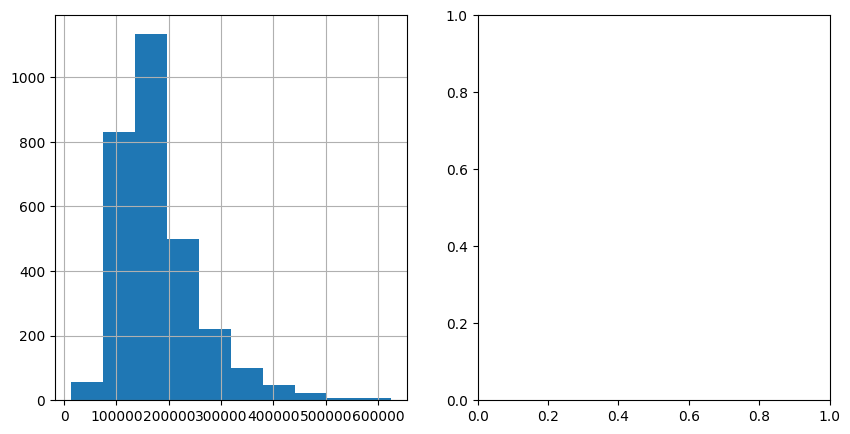

In [41]:
#Allows two axes(2 bounding boxes) in one figure (Empty now)
fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize= (10, 5))

#Create a histogram on right skewed data
#Un transformed by log data
df['SalePrice'].hist(ax=ax_before)

<Axes: >

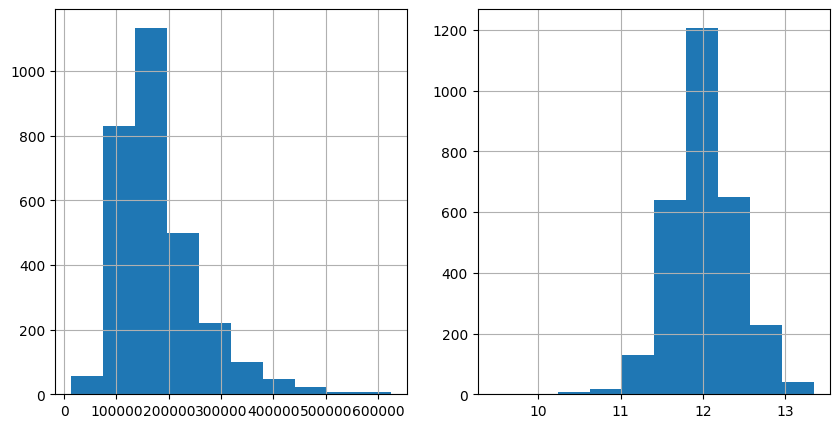

In [42]:
#Allows two axes(2 bounding boxes) in one figure
fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize= (10, 5))

#Create a histogram on right skewed data
#Un transformed by log data
df['SalePrice'].hist(ax=ax_before)

#Transformed SalePrice data to plot after log transforming via .apply(np.log1p)
df['SalePrice'].apply(np.log1p).hist(ax=ax_after)


**Create two subplots and a figure using matplotlib**

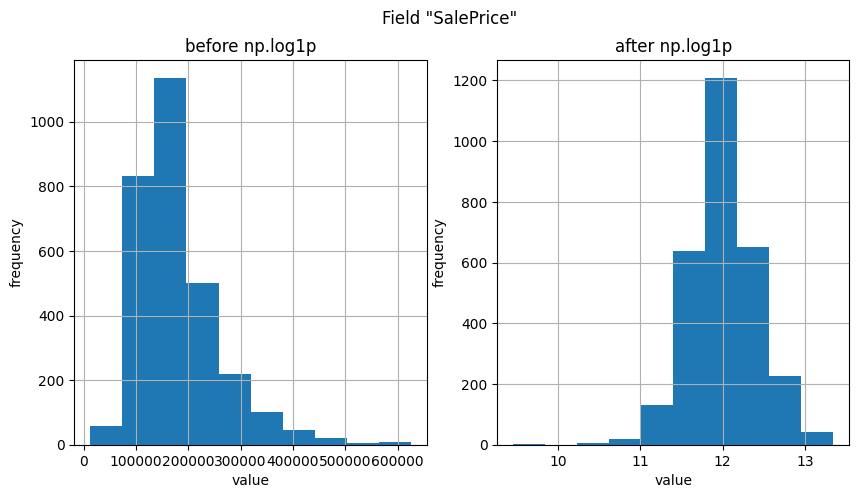

In [43]:
#Choose a field

field = "SalePrice"

#Allows two axes(2 bounding boxes) in one figure
fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize= (10, 5))

#Create histogtram on the "ax_before subplot"
df[field].hist(ax=ax_before)

#Apply a log transformation (numpy syntax) to this column
df[field].apply(np.log1p).hist(ax=ax_after)

#Formatting of titles
ax_before.set(title='before np.log1p', ylabel='frequency', xlabel='value')
ax_after.set(title='after np.log1p', ylabel='frequency', xlabel='value')
fig.suptitle('Field "{}"'.format(field));

##**Transforming**

> Log transforming all skewed columns or entire skewed data by the ske_value = 0.75 using the log transformation

In [47]:
for col in skew_cols.index.values:
  if col == "SalePrice":
    continue
  df[col] = df[col].apply(np.log1p)

df.head(5)

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,0.628272,RL,0.705086,0.803234,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0.0,NaN,NaN,NaN,0.000000,5,2010,WD,Normal,215000
1,0.628272,RH,0.687038,0.790899,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0.0,NaN,MnPrv,NaN,0.000000,6,2010,WD,Normal,105000
2,0.628272,RL,0.687463,0.793550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0.0,NaN,NaN,Gar2,0.791849,6,2010,WD,Normal,172000
3,0.628272,RL,0.692098,0.790366,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0.0,NaN,NaN,NaN,0.000000,4,2010,WD,Normal,244000
4,0.676766,RL,0.684335,0.793153,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0.0,NaN,MnPrv,NaN,0.000000,3,2010,WD,Normal,189900


In [136]:
df.shape

(2925, 261)

> Checking for missing values




> **missing values in original data vs transformed data

In [48]:
#.sort_values() so all columns containing null values stack in bottom
df.isnull().sum().sort_values()

MS SubClass          0
Sale Condition       0
Central Air          0
1st Flr SF           0
2nd Flr SF           0
                  ... 
Mas Vnr Type      1774
Fence             2354
Alley             2727
Misc Feature      2820
Pool QC           2914
Length: 80, dtype: int64

In [49]:
data.isnull().sum().sort_values()

Order                0
Sale Condition       0
Heating QC           0
Central Air          0
1st Flr SF           0
                  ... 
Mas Vnr Type      1774
Fence             2354
Alley             2727
Misc Feature      2820
Pool QC           2914
Length: 82, dtype: int64

In [33]:
missing_values = df.isna()
missing_values_count = missing_values.sum().sort_values()
print(missing_values_count)

MS SubClass          0
Sale Condition       0
Central Air          0
1st Flr SF           0
2nd Flr SF           0
                  ... 
Mas Vnr Type      1774
Fence             2354
Alley             2727
Misc Feature      2820
Pool QC           2914
Length: 80, dtype: int64


##**Feature Engineering: Feature Transformation**



> Choosing few numeric columns to perform feature transformation

> Trying to predict target: 'SalesPrice'

In [51]:
smaller_df = df.loc[:, ['Lot Area', 'Overall Qual', 'Overall Cond',
                      'Year Built', 'Year Remod/Add', 'Gr Liv Area',
                      'Full Bath', 'Bedroom AbvGr', 'Fireplaces',
                      'Garage Cars','SalePrice']]

In [52]:
#Summary statistic for the new df

smaller_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Lot Area,2925.0,0.787024,0.007153,0.756867,0.784861,0.788116,0.790778,0.822903
Overall Qual,2925.0,6.088205,1.402953,1.000000,5.000000,6.000000,7.000000,10.000000
Overall Cond,2925.0,5.563761,1.112262,1.000000,5.000000,5.000000,6.000000,9.000000
Year Built,2925.0,1971.302906,30.242474,1872.000000,1954.000000,1973.000000,2001.000000,2010.000000
Year Remod/Add,2925.0,1984.234188,20.861774,1950.000000,1965.000000,1993.000000,2004.000000,2010.000000
Gr Liv Area,2925.0,0.758314,0.005879,0.728148,0.754174,0.758755,0.762125,0.775076
Full Bath,2925.0,1.564786,0.551386,0.000000,1.000000,2.000000,2.000000,4.000000
Bedroom AbvGr,2925.0,2.853675,0.827737,0.000000,2.000000,3.000000,3.000000,8.000000
Fireplaces,2925.0,0.596923,0.645349,0.000000,0.000000,1.000000,1.000000,4.000000
Garage Cars,2924.0,1.765048,0.759834,0.000000,1.000000,2.000000,2.000000,5.000000


In [53]:
smaller_df.info()
#Garage car has one NA value

<class 'pandas.core.frame.DataFrame'>
Index: 2925 entries, 0 to 2929
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Area        2925 non-null   float64
 1   Overall Qual    2925 non-null   int64  
 2   Overall Cond    2925 non-null   int64  
 3   Year Built      2925 non-null   int64  
 4   Year Remod/Add  2925 non-null   int64  
 5   Gr Liv Area     2925 non-null   float64
 6   Full Bath       2925 non-null   int64  
 7   Bedroom AbvGr   2925 non-null   int64  
 8   Fireplaces      2925 non-null   int64  
 9   Garage Cars     2924 non-null   float64
 10  SalePrice       2925 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 274.2 KB


In [54]:
#Remove Na value in Garage Car column

smaller_df = smaller_df.fillna(0)

In [55]:
#Complete clean and non null value data
smaller_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2925 entries, 0 to 2929
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Area        2925 non-null   float64
 1   Overall Qual    2925 non-null   int64  
 2   Overall Cond    2925 non-null   int64  
 3   Year Built      2925 non-null   int64  
 4   Year Remod/Add  2925 non-null   int64  
 5   Gr Liv Area     2925 non-null   float64
 6   Full Bath       2925 non-null   int64  
 7   Bedroom AbvGr   2925 non-null   int64  
 8   Fireplaces      2925 non-null   int64  
 9   Garage Cars     2925 non-null   float64
 10  SalePrice       2925 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 274.2 KB


## > Pair Plot



using visuals to better understand the target and feature-target relationships in new filtered data


1. What do these plots tell us about the distribution of the target?   

2. What do these plots tell us about the relationship between the features and the target? Do you think that linear regression is well-suited to this problem? Do any feature transformations come to mind?

3. What do these plots tell us about the relationship between various pairs of features? Do you think there may be any problems here?

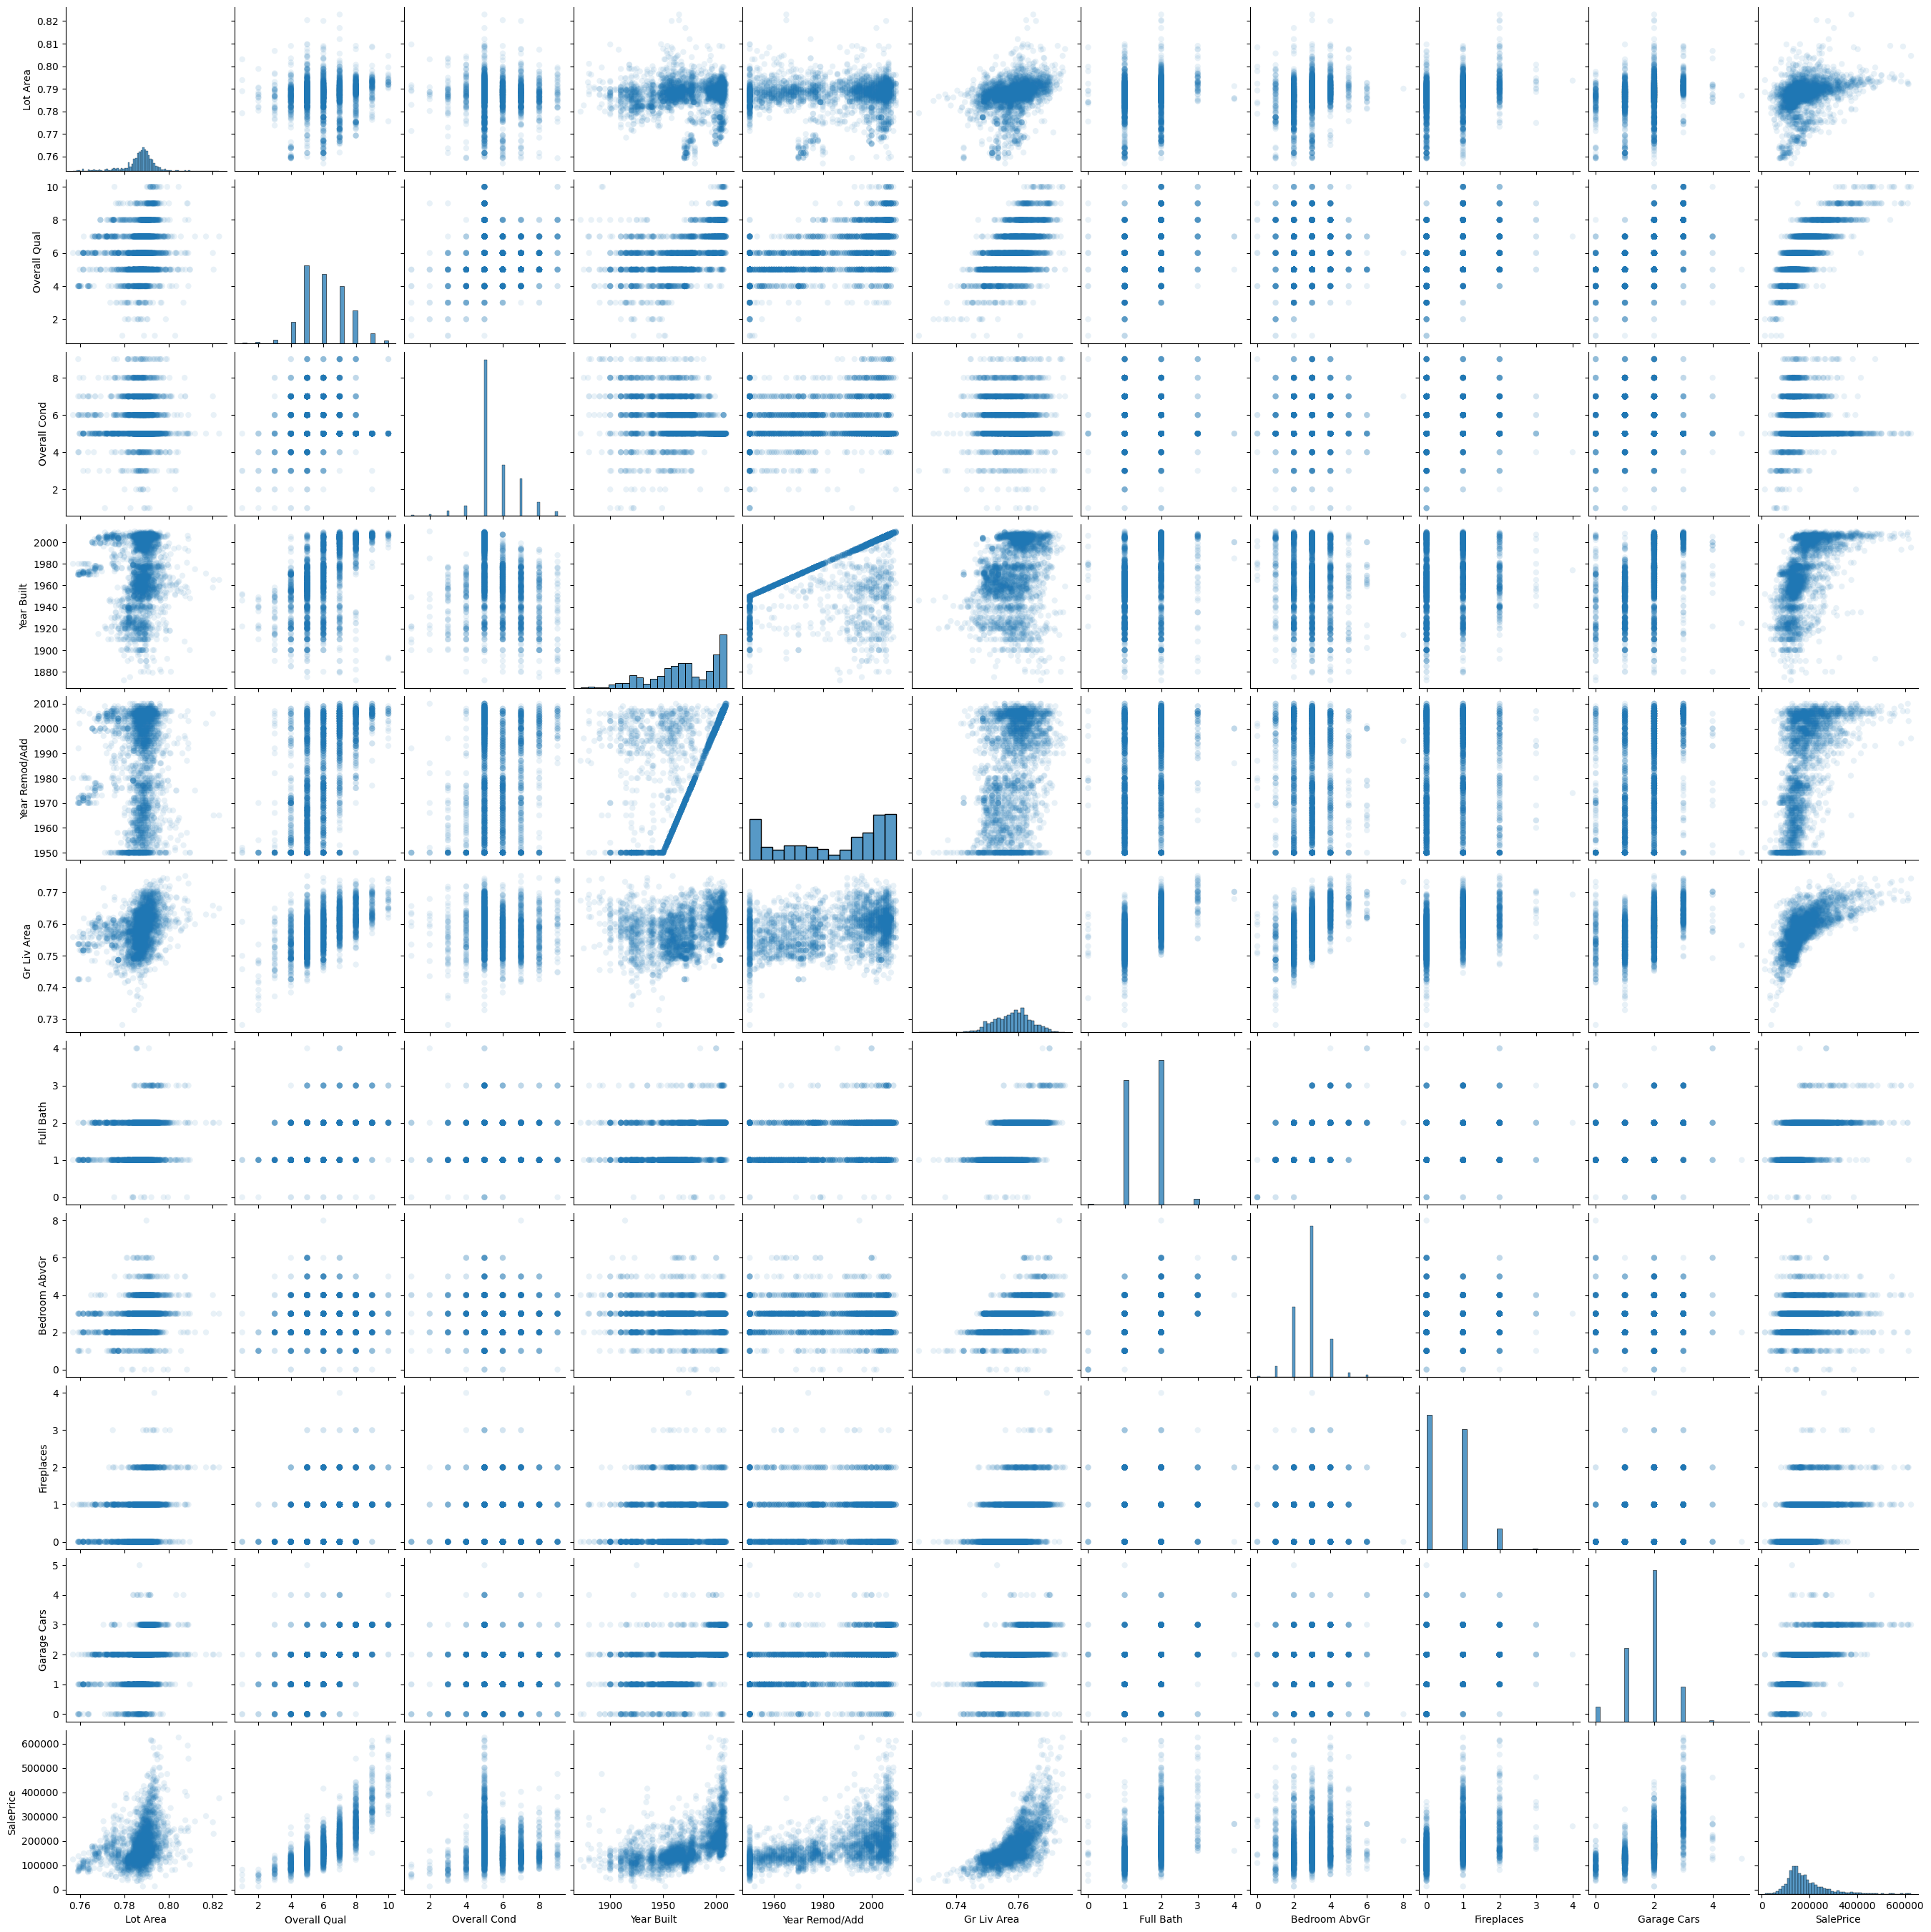

In [56]:
sns.pairplot(smaller_df, plot_kws=dict(alpha=0.1, edgecolor='none'))

**The above graphs an show:**

> Wether there is a linear relationship between each on of the variables and the target column

> Transformations reauired to ensure linear relationship with transform variable and our target variable

> What does the plot tell about relationship between various features

> Bottom right SalesPrice column is right skewed.

> *Second column, lst row **'OverallQual' & Gr Quality** has curvature showing relationship between SalesPrice and Overall Quality(for which we can take a polynimial function)*


**> Seperating Variables each for Target and Features**

In [59]:
#features variable
X = smaller_df.loc[:, ['Lot Area', 'Overall Qual', 'Overall Cond',
                      'Year Built', 'Year Remod/Add', 'Gr Liv Area',
                      'Full Bath', 'Bedroom AbvGr', 'Fireplaces',
                      'Garage Cars']]


#Outcome Variable
Y = smaller_df['SalePrice']

In [60]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2925 entries, 0 to 2929
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Area        2925 non-null   float64
 1   Overall Qual    2925 non-null   int64  
 2   Overall Cond    2925 non-null   int64  
 3   Year Built      2925 non-null   int64  
 4   Year Remod/Add  2925 non-null   int64  
 5   Gr Liv Area     2925 non-null   float64
 6   Full Bath       2925 non-null   int64  
 7   Bedroom AbvGr   2925 non-null   int64  
 8   Fireplaces      2925 non-null   int64  
 9   Garage Cars     2925 non-null   float64
dtypes: float64(3), int64(7)
memory usage: 251.4 KB


In [61]:
Y.info()

<class 'pandas.core.series.Series'>
Index: 2925 entries, 0 to 2929
Series name: SalePrice
Non-Null Count  Dtype
--------------  -----
2925 non-null   int64
dtypes: int64(1)
memory usage: 45.7 KB


## > Transformation: Adding Polynomials and Interaction terms

**Polynimial Features addded to upward curvature plots in sns.pairplots**

In [62]:
X2 =X.copy()


#Just squaring the features column and saving in variable OQ2, GLA2
X2['OQ2'] = X2['Overall Qual'] ** 2
X2['GLA2'] = X2['Gr Liv Area'] ** 2

**Feature Interaction**

> Features are treated independently, but some features have interaction effects, where impact on one features maybe dependednt on current value of differrent feature

> Example: Higher premium for increasing 'Overall Quality" feature for houses built more recently

> Interaction terms can involve **feature porportions**: eg. to get quality per squre foot, we can divide 'Overall Qual' by 'Lot Area'

In [63]:
X3 = X2.copy()

#multiplicative interaction
X3['OQ_x_YB'] = X3['Overall Qual'] * X3['Year Built']

#Division Interaction
X3['OQ_x_LA'] = X3['Overall Qual'] / X3['Lot Area']

print(X3['OQ_x_LA'])
print(X3['OQ_x_YB'])

0       7.469800
1       6.321917
2       7.560960
3       8.856656
4       6.303957
          ...   
2925    7.635886
2926    6.350723
2927    6.333251
2928    6.337767
2929    8.878768
Name: OQ_x_LA, Length: 2925, dtype: float64
0       11760
1        9805
2       11748
3       13776
4        9985
        ...  
2925    11904
2926     9915
2927     9960
2928     9870
2929    13951
Name: OQ_x_YB, Length: 2925, dtype: int64


##Categories and Features Derived from **Feature Aggregates**

> Exploring the 'House Style' feature from the original data

> Its important to check category counts to make sure all categories have reasonable representations oF values, within the categorical features **.value_counts()**

> One-Hot Encoding

> To get dummies for entire data set, for every single categorical feature

In [174]:
pd.get_dummies(data)

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,1,526301100,20,141.0,31770,6,5,1960,1960,112.0,...,False,False,False,True,False,False,False,False,True,False
1,2,526350040,20,80.0,11622,5,6,1961,1961,0.0,...,False,False,False,True,False,False,False,False,True,False
2,3,526351010,20,81.0,14267,6,6,1958,1958,108.0,...,False,False,False,True,False,False,False,False,True,False
3,4,526353030,20,93.0,11160,7,5,1968,1968,0.0,...,False,False,False,True,False,False,False,False,True,False
4,5,527105010,60,74.0,13830,5,5,1997,1998,0.0,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,37.0,7937,6,6,1984,1984,0.0,...,False,False,False,True,False,False,False,False,True,False
2926,2927,923276100,20,NaN,8885,5,5,1983,1983,0.0,...,False,False,False,True,False,False,False,False,True,False
2927,2928,923400125,85,62.0,10441,5,5,1992,1992,0.0,...,False,False,False,True,False,False,False,False,True,False
2928,2929,924100070,20,77.0,10010,5,5,1974,1975,0.0,...,False,False,False,True,False,False,False,False,True,False


In [171]:
data['House Style'].value_counts()
#Shows enough values to specify some type of predictive value

House Style
1Story    1480
2Story     869
1.5Fin     314
SLvl       128
SFoyer      83
2.5Unf      24
1.5Unf      19
2.5Fin       8
Name: count, dtype: int64

In [175]:
pd.get_dummies(data['House Style'], drop_first=True).head()

,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl
0,False,True,False,False,False,False,False
1,False,True,False,False,False,False,False
2,False,True,False,False,False,False,False
3,False,True,False,False,False,False,False
4,False,False,False,False,True,False,False


> Looking at the **neighborhood column counts**, another column we want to by one-hot encoding

> So taking it from one column to x many columns depending on the number of unique values

In [67]:
nbh_counts = data.Neighborhood.value_counts()
nbh_counts

#

Neighborhood
NAmes      443
CollgCr    267
OldTown    239
Edwards    191
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     69
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Greens       8
GrnHill      2
Landmrk      1
Name: count, dtype: int64

> Above category, has couple different values that have a low count, so we can group these together into its own category



In [68]:
nbh_counts[nbh_counts <= 8].index

Index(['Greens', 'GrnHill', 'Landmrk'], dtype='object', name='Neighborhood')

In [69]:
#specifying we want to return with ones index values less then 8
other_nbhs = list(nbh_counts[nbh_counts <= 8].index)
other_nbhs

['Greens', 'GrnHill', 'Landmrk']

> Replacing any of the neighborhoods as specified in other_nbhs list, with 'Other', which will take away the low count values

In [70]:
X4 = X3.copy()
X4['Neighborhood'] = data['Neighborhood'].replace(other_nbhs, 'Other')

In [71]:
X4.Neighborhood.value_counts()

Neighborhood
NAmes      443
CollgCr    267
OldTown    239
Edwards    191
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     69
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Other       11
Blueste     10
Name: count, dtype: int64

##**Adding Fancy Features:**

> Creating features that cpatures where a feature value lies relative to other members of the category it belongs to.


> Calculating deviance of of arose feature value from the mean value within the category it belongs to. This gives information about feature relative to category's distribution. Example: How nice is the house in relative to other houses in a given neighborhood.

> X4 copy of the smaller data frame, which has currently only one categorical column = 'Neighborhood'

Example statement of aggregation via features column

In [74]:
#Getting mean values of 'Overall Qual' via neighborhood
X4.groupby('Neighborhood')['Overall Qual'].transform(lambda x: x.std())

#Getting mean values of 'house quality' by 'Year Built'
X5.groupby('House Qual')[]

0       0.776573
1       0.776573
2       0.776573
3       0.776573
4       0.720823
          ...   
2925    1.048727
2926    1.048727
2927    1.048727
2928    1.048727
2929    1.048727
Name: Overall Qual, Length: 2925, dtype: float64

**> Function to add the features**

In [76]:
def add_deviation_feature(X, feature, category):

  #temp groupby object
  category_gb = X.groupby(category)[feature]

  #Create category means and std deviations for each observations i.e. different neighnorhoods in neighborhood features
  category_mean = category_gb.transform(lambda x: x.mean())
  category_std = category_gb.transform(lambda x: x.std())

  #To add complexity, compute stds from category mean for each feature value
  #add to X as new feature

  deviation_feature = (X[feature] - category_mean) / category_std

  #To name column
  X[feature + '_Dev_' + category] = deviation_feature

#using add_deviation_feature() adding two new deviation features in df

> **To show that if we are looking at a house style wheteher that year built is higher or lower, compared to the at certain house style, and the same for overall quality by neighborhood.**

> ** For overall quality by neighborhood within its neighborhoods compared others in its neighborhood.**


In [79]:
X5 = X4.copy()
X5['House Style'] = df['House Style']

add_deviation_feature(X5, 'Year Built', 'House Style')
add_deviation_feature(X5, 'Overall Qual', 'Neighborhood')


In [81]:
#Shows df with new added features "Year Built_Dev_House Style" and "Overall Qual_Dev_Neighborhood"
X5

,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Gr Liv Area,Full Bath,Bedroom AbvGr,Fireplaces,Garage Cars,OQ2,GLA2,OQ_x_YB,OQ_x_LA,Neighborhood,House Style,Year Built_Dev_House Style,Overall Qual_Dev_Neighborhood
0,0.803234,6,5,1960,1960,0.761251,1,3,2,2.0,36,0.579503,11760,7.469800,NAmes,1Story,-0.590334,0.857503
1,0.790899,5,6,1961,1961,0.749742,1,2,0,1.0,25,0.562112,9805,6.321917,NAmes,1Story,-0.551186,-0.430205
2,0.793550,6,6,1958,1958,0.757275,1,3,0,1.0,36,0.573465,11748,7.560960,NAmes,1Story,-0.668629,0.857503
3,0.790366,7,5,1968,1968,0.765458,2,3,2,2.0,49,0.585926,13776,8.856656,NAmes,1Story,-0.277154,2.145211
4,0.793153,5,5,1997,1998,0.760959,2,3,1,2.0,25,0.579059,9985,6.303957,Gilbert,2Story,0.545208,-2.101974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,0.785763,6,6,1984,1984,0.751953,1,3,0,2.0,36,0.565434,11904,7.635886,Mitchel,SLvl,0.505068,0.434947
2926,0.787312,5,5,1983,1983,0.749874,1,2,0,2.0,25,0.562311,9915,6.350723,Mitchel,1Story,0.310059,-0.518590
2927,0.789484,5,5,1992,1992,0.751302,1,3,0,0.0,25,0.564455,9960,6.333251,Mitchel,SFoyer,1.096487,-0.518590
2928,0.788921,5,5,1974,1975,0.758086,1,2,1,2.0,25,0.574694,9870,6.337767,Mitchel,1Story,-0.042269,-0.518590


##Polynomial Features in Scikit-Learn

> sllearn pre processing

> sklearn allows to build many higher-order terms at once with PolynomialFeatures